In [1]:
! pip install scikit-posthocs

In [2]:
#connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
from scipy.ndimage import gaussian_filter
from PIL import Image
import scipy
import scikit_posthocs as sp
import seaborn as sns

def create_heatmap(csv_path,cover_img):
    csv = pd.read_csv(csv_path, header = None)

    # Save the array to a CSV file
    plt.figure(figsize=(8,8))
    plt.imshow(cover_img)
    plt.imshow(csv, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.savefig(f"/content/drive/MyDrive/resultados_ViT/cesteria_01/{csv_file[:-4]}_heatmap.png");
    plt.close()

#gmm

In [ ]:
def create_heatmap(surface_df,csv_file, cover_img, i,dir_obj):
  csv = pd.read_csv(csv_file, header = None)

  grid = cover_img.shape[0:2] # height, width of the loaded image
  heatmap_detail = 0.01 # this will determine the gaussian blur kerner of the image (higher number = more blur)

  filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
  filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
  heatmap = gaussian_filter(csv, sigma=(filter_w, filter_h), order=0)

  # Step 1: Get height and width
  height, width = heatmap.shape
  # Step 2: Calculate remainder
  height_remainder = height % 16
  width_remainder = width % 16
  # Step 3: Eliminate last rows and columns
  new_height = height - height_remainder
  new_width = width - width_remainder
  # Update the array by keeping only the relevant portion
  your_array = heatmap[:new_height, :new_width]
  # Save the array to a CSV file
  np.savetxt(f"/content/drive/MyDrive/resultados_ViT/{dir_obj}/gmm/{i}.csv", your_array, delimiter=',')
  plt.figure(figsize=(8,8))
  plt.imshow(cover_img)
  plt.imshow(your_array, cmap='jet', alpha=0.5)
  plt.axis('off')
  plt.savefig(f"/content/drive/MyDrive/resultados_ViT/{dir_obj}/gmm/{i}.png");



def gmm(dir_obj):
  csv_folder = f"/content/drive/MyDrive/resultados_ViT/{dir_obj}/csv"
  csv_files = sorted([file for file in os.listdir(csv_folder) if file.endswith(".csv")])

  img = f'/content/drive/MyDrive/imagenes_vit/{dir_obj}.jpg'
  jpg_file = img
  cover_img = plt.imread(jpg_file)

  for csv_file in csv_files:
      csv_path = os.path.join(csv_folder, csv_file)
      create_heatmap(csv_path,csv_path, cover_img, csv_file[:-4],dir_obj)

In [ ]:
lista = [
  "cesteria_01", "cesteria_02", "cesteria_03", "cesteria_04", "cesteria_05",
  "cesteria_06", "cesteria_07", "cesteria_08", "cesteria_09", "cesteria_10",
  "jarra_01", "jarra_02", "jarra_03", "jarra_04", "jarra_05",
  "jarra_06", "jarra_07", "jarra_08", "jarra_09", "jarra_10",
]


#list = [
#  "cesteria_01"]
#list = ['cesteria_01']

for i in lista:
  gmm(i)

Output hidden; open in https://colab.research.google.com to view.

# kullback


In [ ]:
def replace_zero(arr, small_number=1e-10):
    # Convert the array to a numpy array (optional, but it provides convenient functions)
    np_arr = np.array(arr)

    # Find the indices where the values are 0
    zero_indices = np_arr == 0

    # Replace 0 values with a small number greater than 0
    np_arr[zero_indices] = small_number

    # Return the updated array
    return np_arr.tolist()

def kullback(dir_obj):
  array = [dir_obj]


  hum = pd.read_csv(f"/content/drive/MyDrive/resultados_ViT/{dir_obj}/hum/cum_reminder.csv", header=None)
  p = hum
  p_f = replace_zero(p)


  csv_folder = f"/content/drive/MyDrive/resultados_ViT/{dir_obj}/csv"
  csv_files = sorted([file for file in os.listdir(csv_folder) if file.endswith(".csv")])

  for csv_file in csv_files:

    vit_gmm = pd.read_csv(f"/content/drive/MyDrive/resultados_ViT/{dir_obj}/csv/{csv_file}", header=None)
    q = vit_gmm
    q_f = replace_zero(q)

    kullb_hum_to_vit_et = scipy.stats.entropy(p_f, q_f)
    kl = np.sum(kullb_hum_to_vit_et)

    array.append(kl)


  return(array)

In [ ]:
lista = [
  "cesteria_01", "cesteria_02", "cesteria_03", "cesteria_04", "cesteria_05",
  "cesteria_06", "cesteria_07", "cesteria_08", "cesteria_09", "cesteria_10",
  "jarra_01", "jarra_02", "jarra_03", "jarra_04", "jarra_05",
  "jarra_06", "jarra_07", "jarra_08", "jarra_09", "jarra_10",
]

col = [
    "img", "avg" ,"0", "1", "10", "11", "2" , "3" ,"4", "5", "6" , "7", "8", "9"
]

n = 0
for i in lista:
  col = np.vstack([col,kullback(i)])


In [ ]:
df = pd.DataFrame(col)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
df

,img,avg,0,1,10,11,2,3,4,5,6,7,8,9
1,cesteria_01,1246.2954548379143,1395.955833749681,1653.7025315302135,1359.3635374090068,1106.7568953280543,1554.015182919392,1359.3048999699104,1217.2256315825366,1637.761868318114,1975.9796788870974,1485.5230286856881,1538.0451169237228,1211.4207949287525
2,cesteria_02,333.2542687751305,393.53975932318906,444.88719990258477,374.6870772363741,284.1728575068545,377.2034926829656,371.02969296975607,354.35994514802684,393.6262959397411,432.5663934000029,415.8680682906305,393.74191745927567,384.9896878936831
3,cesteria_03,1184.5811274115354,1175.352100838763,1307.522738781467,1241.9689924525169,867.8392038543539,1278.6300251569487,1248.5234547192242,1020.7476112898047,1329.734030851543,1885.816142913091,1417.502202115801,1474.944013410105,1152.1753628304605
4,cesteria_04,698.0269550914511,732.4113695278561,901.1276124472844,863.5500438031074,562.4118273940118,715.6825869367851,748.2432333759145,665.7408137477335,782.1033293615812,1057.0893563293857,741.6526038944642,924.8018923571789,762.2590478908202
5,cesteria_05,1215.0701221292252,1181.0914696958937,1389.684295928713,1297.2358193963883,867.3597132288319,1327.678543681892,1317.6293967000267,1045.7017511811337,1678.0556906277357,1595.2474248391673,1827.5408881045512,1392.5790981955586,1140.2613026790423
6,cesteria_06,1447.1161371820058,1534.5879763572389,1699.9104948208956,1563.5598901583344,1465.564520091975,1486.680924555948,1762.5439272285575,1339.6493683988688,1621.1805272692934,1792.268887738704,1594.9172908836877,1667.7355604836412,1444.8444144257405
7,cesteria_07,794.1628773887387,957.1134403713734,943.2216038589866,878.5206925049409,685.7220335648547,870.9345658582811,987.1590811936144,769.193848257007,800.2589074926087,1131.7737256350424,756.9401868560159,899.3593539351584,711.1184006093918
8,cesteria_08,1494.3298722357454,1824.0081362234478,1754.6678205403011,1484.1981683936938,1326.87271357083,1752.7151677248648,1417.5843730786237,1427.370282057285,1764.1823234886676,2598.4041758165304,1591.49777606044,1619.477111902701,1422.500990938499
9,cesteria_09,568.1029999429379,642.1977052774098,671.8881416821343,569.4204893288509,528.5173997165889,610.0151221209812,567.2952313927688,572.6463684416817,634.5450023071191,631.8095652057789,699.9651459232094,641.1255480687616,585.5361886457843
10,cesteria_10,598.4918561085569,748.0320778047188,805.9560820179443,611.7123616106387,443.6600670064379,801.3994623118945,810.2730369767871,536.858864870085,782.932097169396,850.744268255368,725.9782282912588,669.8860816629236,409.00761934334287


In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')

df.dtypes

0
img     object
avg    float64
0      float64
1      float64
10     float64
11     float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
dtype: object

In [ ]:
df

,img,avg,0,1,10,11,2,3,4,5,6,7,8,9
1,cesteria_01,1246.295455,1395.955834,1653.702532,1359.363537,1106.756895,1554.015183,1359.304900,1217.225632,1637.761868,1975.979679,1485.523029,1538.045117,1211.420795
2,cesteria_02,333.254269,393.539759,444.887200,374.687077,284.172858,377.203493,371.029693,354.359945,393.626296,432.566393,415.868068,393.741917,384.989688
3,cesteria_03,1184.581127,1175.352101,1307.522739,1241.968992,867.839204,1278.630025,1248.523455,1020.747611,1329.734031,1885.816143,1417.502202,1474.944013,1152.175363
4,cesteria_04,698.026955,732.411370,901.127612,863.550044,562.411827,715.682587,748.243233,665.740814,782.103329,1057.089356,741.652604,924.801892,762.259048
5,cesteria_05,1215.070122,1181.091470,1389.684296,1297.235819,867.359713,1327.678544,1317.629397,1045.701751,1678.055691,1595.247425,1827.540888,1392.579098,1140.261303
6,cesteria_06,1447.116137,1534.587976,1699.910495,1563.559890,1465.564520,1486.680925,1762.543927,1339.649368,1621.180527,1792.268888,1594.917291,1667.735560,1444.844414
7,cesteria_07,794.162877,957.113440,943.221604,878.520693,685.722034,870.934566,987.159081,769.193848,800.258907,1131.773726,756.940187,899.359354,711.118401
8,cesteria_08,1494.329872,1824.008136,1754.667821,1484.198168,1326.872714,1752.715168,1417.584373,1427.370282,1764.182323,2598.404176,1591.497776,1619.477112,1422.500991
9,cesteria_09,568.103000,642.197705,671.888142,569.420489,528.517400,610.015122,567.295231,572.646368,634.545002,631.809565,699.965146,641.125548,585.536189
10,cesteria_10,598.491856,748.032078,805.956082,611.712362,443.660067,801.399462,810.273037,536.858865,782.932097,850.744268,725.978228,669.886082,409.007619


In [ ]:
df.to_csv("/content/drive/MyDrive/resultados_ViT/kl_divergence.csv")

#test de medias, medianas y post hoc

Dataframe de distancias de kullback

In [4]:
df = pd.read_csv("/content/drive/MyDrive/resultados_ViT/kl_divergence.csv", header = 0, index_col = 0)
df

,img,avg,0,1,10,11,2,3,4,5,6,7,8,9
1,cesteria_01,1246.295455,1395.955834,1653.702532,1359.363537,1106.756895,1554.015183,1359.304900,1217.225632,1637.761868,1975.979679,1485.523029,1538.045117,1211.420795
2,cesteria_02,333.254269,393.539759,444.887200,374.687077,284.172858,377.203493,371.029693,354.359945,393.626296,432.566393,415.868068,393.741917,384.989688
3,cesteria_03,1184.581127,1175.352101,1307.522739,1241.968992,867.839204,1278.630025,1248.523455,1020.747611,1329.734031,1885.816143,1417.502202,1474.944013,1152.175363
4,cesteria_04,698.026955,732.411370,901.127612,863.550044,562.411827,715.682587,748.243233,665.740814,782.103329,1057.089356,741.652604,924.801892,762.259048
5,cesteria_05,1215.070122,1181.091470,1389.684296,1297.235819,867.359713,1327.678544,1317.629397,1045.701751,1678.055691,1595.247425,1827.540888,1392.579098,1140.261303
6,cesteria_06,1447.116137,1534.587976,1699.910495,1563.559890,1465.564520,1486.680925,1762.543927,1339.649368,1621.180527,1792.268888,1594.917291,1667.735560,1444.844414
7,cesteria_07,794.162877,957.113440,943.221604,878.520693,685.722034,870.934566,987.159081,769.193848,800.258907,1131.773726,756.940187,899.359354,711.118401
8,cesteria_08,1494.329872,1824.008136,1754.667821,1484.198168,1326.872714,1752.715168,1417.584373,1427.370282,1764.182323,2598.404176,1591.497776,1619.477112,1422.500991
9,cesteria_09,568.103000,642.197705,671.888142,569.420489,528.517400,610.015122,567.295231,572.646368,634.545002,631.809565,699.965146,641.125548,585.536189
10,cesteria_10,598.491856,748.032078,805.956082,611.712362,443.660067,801.399462,810.273037,536.858865,782.932097,850.744268,725.978228,669.886082,409.007619


Resumen dataframe

In [ ]:
df.describe()

,avg,0,1,10,11,2,3,4,5,6,7,8,9
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,958.372279,1054.731085,1143.002905,1018.699031,816.012292,1049.196417,1070.536267,912.353554,1134.723899,1321.392641,1105.836713,1195.664162,964.966624
std,333.220385,367.996011,419.392959,350.399412,302.620410,375.412048,348.631723,292.999229,410.571647,524.516675,416.794977,400.953888,348.372896
min,333.254269,393.539759,444.887200,374.687077,284.172858,377.203493,371.029693,354.359945,393.626296,432.566393,415.868068,393.741917,384.989688
25%,691.970573,774.686270,877.334730,810.290040,614.949202,785.282748,794.765586,743.330590,795.927205,1014.694624,737.734010,918.441258,734.415247
50%,937.900851,1024.012638,1047.379002,1013.535648,832.461936,981.443955,1122.035931,900.034847,1063.023246,1218.540526,1093.583276,1208.000548,1002.347562
75%,1222.876455,1273.076535,1418.755292,1312.767749,994.985793,1345.777170,1328.048273,1088.582721,1599.491095,1675.138457,1441.703003,1490.719289,1170.940849
max,1494.329872,1824.008136,1850.439709,1563.559890,1465.564520,1752.715168,1762.543927,1427.370282,1764.182323,2598.404176,1827.540888,1835.810285,1508.604256


Heatmap de distancias

<Axes: >

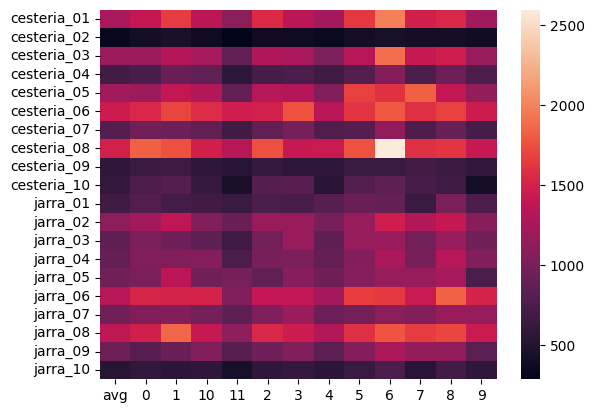

In [ ]:
sns.heatmap(data = df.iloc[:,1:], yticklabels=df.iloc[:,0] )

boxplot de medias de distancias

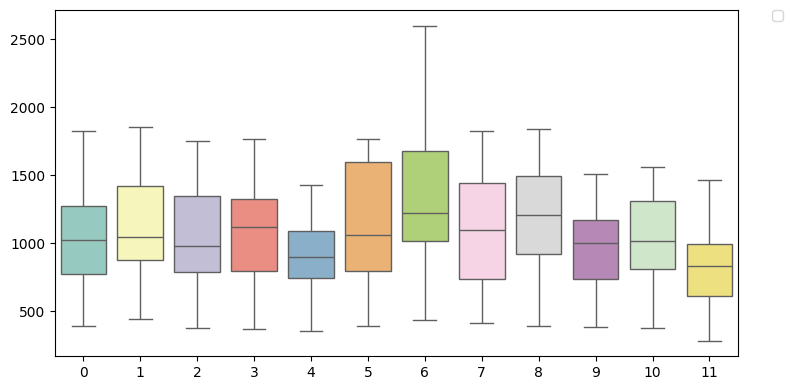

In [ ]:
sprays = df.to_numpy()

plt.figure(figsize=(8, 4))

box = sns.boxplot([df["0"], df["1"],df["2"], df["3"],df["4"], df["5"],df["6"], df["7"],df["8"], df["9"],df["10"], df["11"]] , palette="Set3")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

Combinaciones de cabezas de atención posibles

In [5]:
from itertools import combinations

df2 = df.iloc[:,2:]
df2.columns



Index(['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [ ]:
combinations(df2.columns,2)

In [ ]:
combs = list(combinations(df2.columns,2))

#combs

Test de medianas

In [ ]:
qwerty = scipy.stats.median_test(df["0"], df["1"],df["2"], df["3"],df["4"], df["5"],df["6"], df["7"],df["8"], df["9"],df["10"], df["11"])
qwerty

MedianTestResult(statistic=20.8, pvalue=0.035503315605610444, median=1036.2740320695893, table=array([[ 8, 11,  8, 12,  6, 12, 15, 11, 13, 10, 10,  4],
       [12,  9, 12,  8, 14,  8,  5,  9,  7, 10, 10, 16]]))

In [ ]:
qwerty = scipy.stats.median_test(df.iloc[:,2],df.iloc[:,3],df.iloc[:,4],df.iloc[:,5],df.iloc[:,6],df.iloc[:,7],df.iloc[:,8],df.iloc[:,9],df.iloc[:,10],df.iloc[:,11],df.iloc[:,12],df.iloc[:,13])
qwerty

MedianTestResult(statistic=20.8, pvalue=0.035503315605610444, median=1036.2740320695893, table=array([[ 8, 11, 10,  4,  8, 12,  6, 12, 15, 11, 13, 10],
       [12,  9, 10, 16, 12,  8, 14,  8,  5,  9,  7, 10]]))

test de medianas entre *cabezas*

In [ ]:
array = []

for comb in combs:

  v = scipy.stats.median_test(df[f"{comb[0]}"], df[f"{comb[1]}"])

  array.append([comb, v.pvalue, v.median])

print(array)

[[('0', '1'), 0.7518296340458492, 1034.2407312328114], [('0', '10'), 1.0, 1024.0126383945367], [('0', '11'), 0.11384629800665763, 892.4018604693518], [('0', '2'), 0.7518296340458492, 1011.2677176314021], [('0', '3'), 0.34278171114790873, 1041.9486330846248], [('0', '4'), 0.34278171114790873, 970.0096605919316], [('0', '5'), 0.34278171114790873, 1048.3393480488096], [('0', '6'), 0.34278171114790873, 1143.3955016591844], [('0', '7'), 0.7518296340458492, 1034.2407312328114], [('0', '8'), 0.34278171114790873, 1142.3827289979918], [('0', '9'), 1.0, 1024.0126383945367], [('1', '10'), 1.0, 1042.8591542362622], [('1', '11'), 0.11384629800665763, 915.0038709712358], [('1', '2'), 0.7518296340458492, 1011.2170494005939], [('1', '3'), 0.7518296340458492, 1064.8659198222672], [('1', '4'), 0.34278171114790873, 942.6447299813289], [('1', '5'), 0.7518296340458492, 1060.6010566371974], [('1', '6'), 0.7518296340458492, 1166.0799286818437], [('1', '7'), 1.0, 1052.805577461157], [('1', '8'), 0.75182963404

resultados test de medianas

In [ ]:
final = pd.DataFrame(array, columns = ["comb", "p-value", "median"])
final

,comb,p-value,median
0,"(0, 1)",0.751830,1034.240731
1,"(0, 10)",1.000000,1024.012638
2,"(0, 11)",0.113846,892.401860
3,"(0, 2)",0.751830,1011.267718
4,"(0, 3)",0.342782,1041.948633
...,...,...,...
61,"(6, 8)",1.000000,1208.751796
62,"(6, 9)",0.342782,1136.017514
63,"(7, 8)",0.751830,1161.112669
64,"(7, 9)",0.751830,1047.252805


Top 14 valores que tienen rechazan hipotesis nula

In [ ]:
final.sort_values("p-value").head(14)

,comb,p-value,median
34,"(11, 6)",0.004427,1005.621394
52,"(4, 6)",0.004427,1051.395554
31,"(11, 3)",0.026857,950.657355
36,"(11, 8)",0.026857,954.576042
54,"(4, 8)",0.113846,1018.057226
26,"(10, 6)",0.113846,1113.600016
28,"(10, 8)",0.113846,1098.390144
12,"(1, 11)",0.113846,915.003871
45,"(3, 4)",0.113846,996.194792
30,"(11, 2)",0.113846,869.386885


In [ ]:
median = []
Box_median = []
columnas = []
for i in df2.columns:
  median = []
  columnas.append(i)
  for j in df2.columns:
    median.append(scipy.stats.median_test(df[f"{i}"], df[f"{j}"]).pvalue)
  Box_median.append(median)

tabla = pd.DataFrame(Box_median,index = columnas , columns=columnas )
tabla

,0,1,10,11,2,3,4,5,6,7,8,9
0,1.000000,0.751830,1.000000,0.113846,0.751830,0.342782,0.342782,0.342782,0.342782,0.751830,0.342782,1.000000
1,0.751830,1.000000,1.000000,0.113846,0.751830,0.751830,0.342782,0.751830,0.751830,1.000000,0.751830,1.000000
10,1.000000,1.000000,1.000000,0.113846,1.000000,0.751830,0.342782,0.342782,0.113846,1.000000,0.113846,1.000000
11,0.113846,0.113846,0.113846,1.000000,0.113846,0.026857,0.751830,0.113846,0.004427,0.113846,0.026857,0.751830
2,0.751830,0.751830,1.000000,0.113846,1.000000,0.342782,0.342782,0.342782,0.342782,0.751830,0.342782,1.000000
3,0.342782,0.751830,0.751830,0.026857,0.342782,1.000000,0.113846,0.751830,0.751830,1.000000,0.751830,0.751830
4,0.342782,0.342782,0.342782,0.751830,0.342782,0.113846,1.000000,0.342782,0.004427,0.342782,0.113846,0.751830
5,0.342782,0.751830,0.342782,0.113846,0.342782,0.751830,0.342782,1.000000,0.342782,1.000000,0.342782,0.751830
6,0.342782,0.751830,0.113846,0.004427,0.342782,0.751830,0.004427,0.342782,1.000000,0.751830,1.000000,0.342782
7,0.751830,1.000000,1.000000,0.113846,0.751830,1.000000,0.342782,1.000000,0.751830,1.000000,0.751830,0.751830


<Axes: >

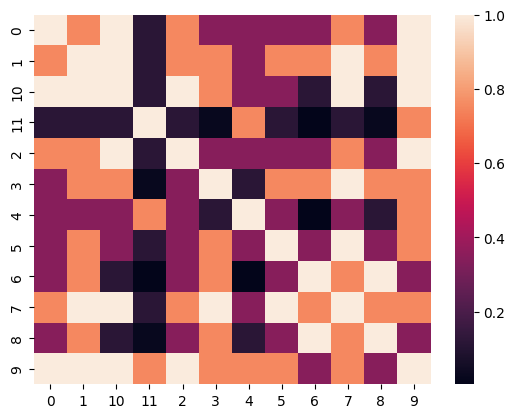

In [ ]:
sns.heatmap(tabla)

**Test de krustal wallis**

In [6]:
data = [df2["0"], df2["1"],df2["2"], df2["3"],df2["4"], df2["5"],df2["6"], df2["7"],df2["8"], df2["9"],df2["10"], df2["11"]]

In [ ]:
# kuratkal_wallis

scipy.stats.kruskal(df2["0"], df2["1"],df2["2"], df2["3"],df2["4"], df2["5"],df2["6"], df2["7"],df2["8"], df2["9"],df2["10"], df2["11"])


KruskalResult(statistic=21.34535269709545, pvalue=0.02996461687772985)

Dunn Beforroni post hoc kruskall

Bonferroni-Dunn post hoc

In [ ]:
p_values = sp.posthoc_dunn(data, p_adjust='holm')

p_values.columns=df2.columns
p_values.index=df2.columns
p_values

,0,1,10,11,2,3,4,5,6,7,8,9
0,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000
1,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,0.624181
10,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000
11,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000
2,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.299234,1.0,1.000000,1.0,1.0,1.000000
3,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,0.593709
4,1.0,1.000000,1.0,1.0,0.299234,1.000000,1.000000,1.0,1.000000,1.0,1.0,0.017881
5,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000
6,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,0.123087
7,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000


<Axes: >

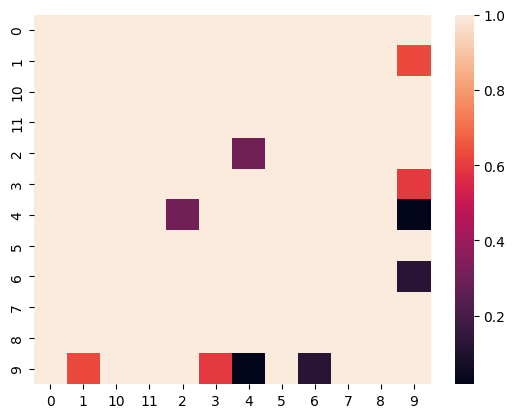

In [ ]:
sns.heatmap(data = p_values )

In [ ]:
p_values = sp.posthoc_dunn([df2["0"], df2["1"],df2["10"], df2["11"],df2["2"], df2["3"],df2["4"], df2["5"],df2["6"], df2["7"],df2["8"], df2["9"]], p_adjust='holm')

p_values.columns=df2.columns
p_values.index=df2.columns
p_values

,0,1,10,11,2,3,4,5,6,7,8,9
0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0
1,1.0,1.000000,1.0,0.624181,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0
10,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0
11,1.0,0.624181,1.0,1.000000,1.0,1.0,1.000000,0.593709,0.017881,1.0,0.123087,1.0
2,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0
3,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0
4,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.299234,1.0,1.000000,1.0
5,1.0,1.000000,1.0,0.593709,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0
6,1.0,1.000000,1.0,0.017881,1.0,1.0,0.299234,1.000000,1.000000,1.0,1.000000,1.0
7,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0


In [ ]:
p_values = sp.posthoc_dunn([df2["0"], df2["1"],df2["10"], df2["11"],df2["2"], df2["3"],df2["4"], df2["5"], df2["7"],df2["8"], df2["9"]], p_adjust='holm')
p_values.columns=[0,1,10,11,2,3,4,5,7,8,9]
p_values.index=[0,1,10,11,2,3,4,5,7,8,9]

print(p_values)

     0         1    1         11   2    3    4         5         7         8   \
0   1.0  1.000000  1.0  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.000000   
1   1.0  1.000000  1.0  0.496578  1.0  1.0  1.0  1.000000  1.000000  1.000000   
1   1.0  1.000000  1.0  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.000000   
11  1.0  0.496578  1.0  1.000000  1.0  1.0  1.0  0.443764  0.983088  0.092203   
2   1.0  1.000000  1.0  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.000000   
3   1.0  1.000000  1.0  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.000000   
4   1.0  1.000000  1.0  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.000000   
5   1.0  1.000000  1.0  0.443764  1.0  1.0  1.0  1.000000  1.000000  1.000000   
7   1.0  1.000000  1.0  0.983088  1.0  1.0  1.0  1.000000  1.000000  1.000000   
8   1.0  1.000000  1.0  0.092203  1.0  1.0  1.0  1.000000  1.000000  1.000000   
9   1.0  1.000000  1.0  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.000000   

     9   
0   1.0  
1   1.0

<Axes: >

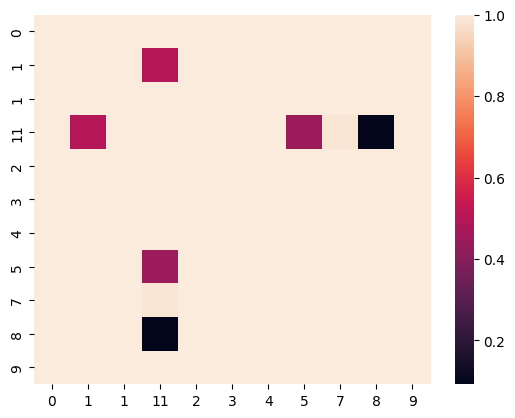

In [ ]:
sns.heatmap(data = p_values )

Anova

In [ ]:
# anova

scipy.stats.f_oneway(df2["0"], df2["1"],df2["2"], df2["3"],df2["4"], df2["5"],df2["6"], df2["7"],df2["8"], df2["9"],df2["10"], df2["11"])

F_onewayResult(statistic=2.3774065774977893, pvalue=0.008408953232704169)

post hoc tukes hsd

In [ ]:
hsd = scipy.stats.tukey_hsd(df2["0"], df2["1"],df2["2"], df2["3"],df2["4"], df2["5"],df2["6"], df2["7"],df2["8"], df2["9"],df2["10"], df2["11"])

print(type(hsd))

<class 'scipy.stats._hypotests.TukeyHSDResult'>


In [ ]:
print(hsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -88.272     1.000  -489.747   313.203
 (0 - 2)      5.535     1.000  -395.940   407.010
 (0 - 3)    -15.805     1.000  -417.280   385.670
 (0 - 4)    142.378     0.991  -259.097   543.853
 (0 - 5)    -79.993     1.000  -481.468   321.482
 (0 - 6)   -266.662     0.556  -668.137   134.813
 (0 - 7)    -51.106     1.000  -452.581   350.369
 (0 - 8)   -140.933     0.991  -542.408   260.542
 (0 - 9)     89.764     1.000  -311.711   491.239
 (0 - 10)     36.032     1.000  -365.443   437.507
 (0 - 11)    238.719     0.717  -162.756   640.194
 (1 - 0)     88.272     1.000  -313.203   489.747
 (1 - 2)     93.806     1.000  -307.668   495.281
 (1 - 3)     72.467     1.000  -329.008   473.942
 (1 - 4)    230.649     0.760  -170.826   632.124
 (1 - 5)      8.279     1.000  -393.196   409.754
 (1 - 6)   -178.390     0.948  -579.865   223.085
 (1 - 7)     37.166     1.000 

# graficos extra